In [1]:
import numpy as np
import pandas as pd
import seaborn as sys
import matplotlib.pyplot as plt


**1. Load the dataset into python environment**

In [57]:
data=pd.read_csv('/content/drive/MyDrive/DSA WORKS/weeek10/titanic_dataset.csv')

In [13]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data Loaded

**2. Make ‘PassengerId’ as the index column**

In [58]:
data=data.set_index(['PassengerId'])
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**3. Check the basic details of the dataset**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
data.shape

(891, 11)

In [18]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**4. Fill in all the missing values present in all the columns in the dataset**

In [19]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [59]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [27]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**5. Check and handle outliers in at least 3 columns in the dataset**

{'boxes': [<matplotlib.lines.Line2D at 0x7f3b15f3e3d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3b15bc8450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b15f45690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b15f45450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3b15ec53d0>,
  <matplotlib.lines.Line2D at 0x7f3b15bc8d50>]}

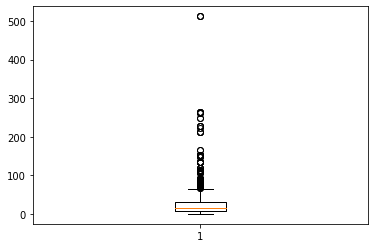

In [28]:
plt.boxplot(data['Fare'])

there is many outliers for Fare let us process it

In [32]:
q1=np.percentile(data['Fare'],25,interpolation='midpoint')
q2=np.percentile(data['Fare'],50,interpolation='midpoint')
q3=np.percentile(data['Fare'],75,interpolation='midpoint')
iqr=q3-q1
low_lm=q1-(1.5*iqr)
up_lm=q3+(1.5*iqr)
print('Q1:',q1,'\nQ2:',q2,'\nQ3',q3,'\nIQR:',iqr,'\nLow limit:',low_lm,'\nup limit:',up_lm) 

Q1: 7.9104 
Q2: 14.4542 
Q3 31.0 
IQR: 23.0896 
Low limit: -26.724 
up limit: 65.6344


In [34]:
outlier=[]
for x in data['Fare']:
  if((x<low_lm)|(x>up_lm)):
    outlier.append(x)
outlier


[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [36]:
ind1=data['Fare']<low_lm
indes=data.loc[ind1].index

In [51]:
indes

Int64Index([], dtype='int64', name='PassengerId')

{'boxes': [<matplotlib.lines.Line2D at 0x7f3b12e21ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3b12e26ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b12e2fb10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b12e2f5d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3b12e26050>,
  <matplotlib.lines.Line2D at 0x7f3b12e26590>]}

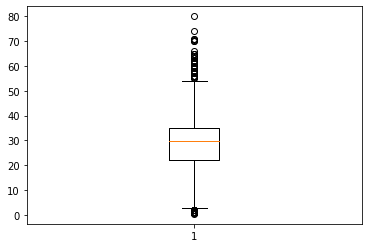

In [47]:
plt.boxplot(data['Age'])

In [48]:
q1=np.percentile(data['Age'],25,interpolation='midpoint')
q2=np.percentile(data['Age'],50,interpolation='midpoint')
q3=np.percentile(data['Age'],75,interpolation='midpoint')
iqr=q3-q1
low_lm=q1-(1.5*iqr)
up_lm=q3+(1.5*iqr)
print('Q1:',q1,'\nQ2:',q2,'\nQ3',q3,'\nIQR:',iqr,'\nLow limit:',low_lm,'\nup limit:',up_lm)

Q1: 22.0 
Q2: 29.69911764705882 
Q3 35.0 
IQR: 13.0 
Low limit: 2.5 
up limit: 54.5


In [49]:
ind2=data['Age']<low_lm
indes1=data.loc[ind2].index

In [50]:
indes1

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

{'boxes': [<matplotlib.lines.Line2D at 0x7f3b12cd6450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3b12cdb510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b12ce4550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b12cdbfd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3b12cd6a50>,
  <matplotlib.lines.Line2D at 0x7f3b12cd6f90>]}

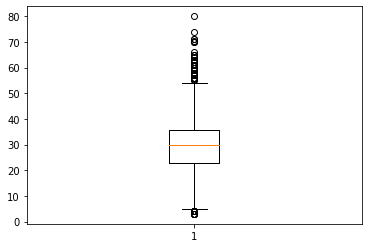

In [60]:
for x in indes1:
  data.drop(x,inplace=True)
plt.boxplot(data['Age'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f3b12cbae90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3b12cc4e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b12d68390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b12c49990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3b12cc4410>,
  <matplotlib.lines.Line2D at 0x7f3b12cc4950>]}

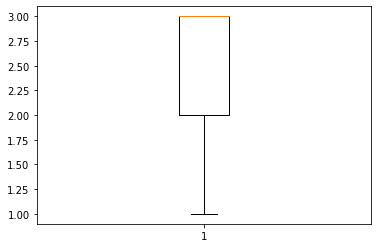

In [61]:
plt.boxplot(data['Pclass'])

In [62]:
q1=np.percentile(data['Pclass'],25,interpolation='midpoint')
q2=np.percentile(data['Pclass'],50,interpolation='midpoint')
q3=np.percentile(data['Pclass'],75,interpolation='midpoint')
iqr=q3-q1
low_lm=q1-(1.5*iqr)
up_lm=q3+(1.5*iqr)
print('Q1:',q1,'\nQ2:',q2,'\nQ3',q3,'\nIQR:',iqr,'\nLow limit:',low_lm,'\nup limit:',up_lm)

Q1: 2.0 
Q2: 3.0 
Q3 3.0 
IQR: 1.0 
Low limit: 0.5 
up limit: 4.5


In [63]:
ind3=data['Pclass']<low_lm
indes2=data.loc[ind2].index

{'boxes': [<matplotlib.lines.Line2D at 0x7f3b12c3e310>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3b12c44390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b12bcb3d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b12c44e50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3b12c3e8d0>,
  <matplotlib.lines.Line2D at 0x7f3b12c3ee10>]}

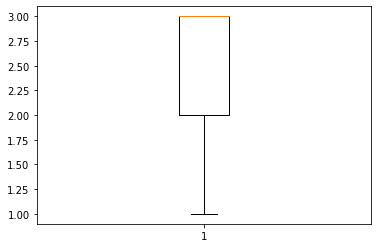

In [64]:
for x in indes2:
  data.drop(x,inplace=True)
plt.boxplot(data['Pclass'])

**6. Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [39]:
from sklearn import preprocessing

In [40]:
minimaxscaler=preprocessing.MinMaxScaler()

In [44]:
data1=pd.DataFrame(data[['Survived','SibSp']])
data1[['Survived','SibSp']]=minimaxscaler.fit_transform(data1[['Survived','SibSp']])

In [45]:
data1

,Survived,SibSp
PassengerId,,
1,0.0,0.125
2,1.0,0.125
3,1.0,0.000
4,1.0,0.125
5,0.0,0.000
...,...,...
887,0.0,0.000
888,1.0,0.000
889,0.0,0.125
